In [ ]:
!pip install tensorflow

In [54]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import seaborn as sns
import pandas as pd

In [17]:
tf.__version__

'2.18.0'

In [18]:
%load_ext tensorboard

In [19]:
logdir='log'

In [21]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images, test_images = train_images / 255.0, test_images / 255.0

classes={0,1,2,3,4,5,6,7,8,9}

In [22]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir, histogram_freq=1)

In [24]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images,
          y=train_labels,
          epochs=5,
          validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 59s 30ms/step - accuracy: 0.8935 - loss: 0.3402 - val_accuracy: 0.9834 - val_loss: 0.0496
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 101s 40ms/step - accuracy: 0.9852 - loss: 0.0482 - val_accuracy: 0.9873 - val_loss: 0.0362
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 40ms/step - accuracy: 0.9900 - loss: 0.0303 - val_accuracy: 0.9844 - val_loss: 0.0509
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 66s 31ms/step - accuracy: 0.9926 - loss: 0.0220 - val_accuracy: 0.9902 - val_loss: 0.0337
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 31ms/step - accuracy: 0.9938 - loss: 0.0186 - val_accuracy: 0.9898 - val_loss: 0.0337


In [26]:
y_true = test_labels
y_pred = np.argmax(model.predict(test_images), axis=-1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


In [27]:
classes={0,1,2,3,4,5,6,7,8,9}

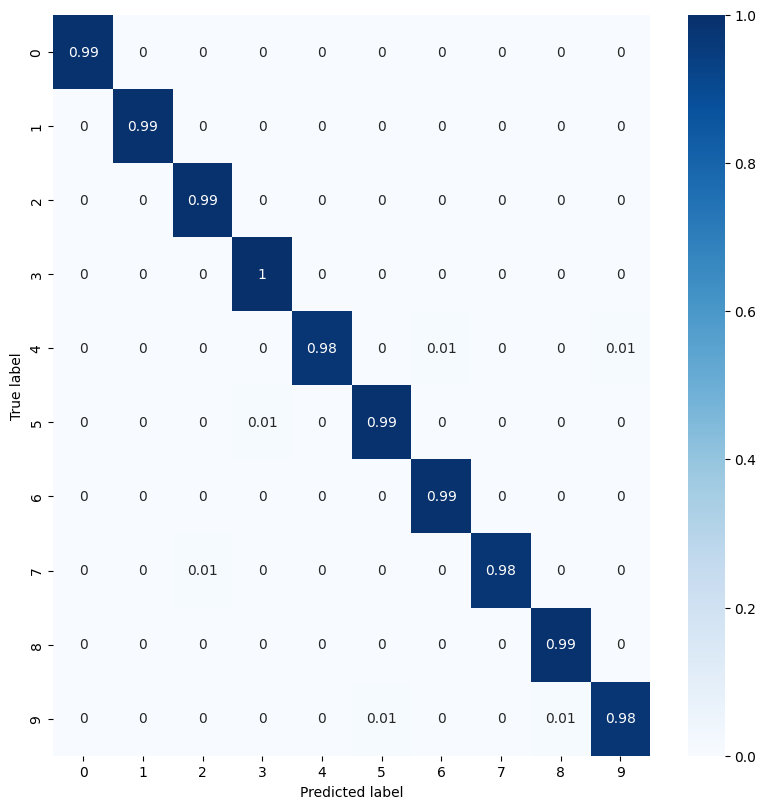

In [29]:
con_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

classes_list = list(classes)

con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes_list,
                     columns = classes_list)

figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Calculo das métricas de avaliação de aprendizado

## Sensibilidade



In [36]:
print("Valores reais")
print(con_mat)

Valores reais
[[ 974    0    0    0    0    0    2    1    0    3]
 [   0 1129    2    3    0    0    0    0    0    1]
 [   0    1 1026    0    0    0    2    3    0    0]
 [   0    0    1 1007    0    1    0    0    1    0]
 [   0    2    1    0  963    0    5    0    2    9]
 [   1    0    0    5    0  882    2    0    1    1]
 [   1    2    0    0    1    1  952    0    1    0]
 [   0    3   10    1    0    0    0 1009    1    4]
 [   2    0    2    0    0    0    2    3  964    1]
 [   0    1    0    0    1    6    0    1    8  992]]


## Exemplo de uma classe calculada


### **Sensibilidade**

No caso do calculo da sensibilidade vamos observar os dados nas linhas de cada classe. A classe selecionada foi a 0 com número total de 980 (974 + 2 + 1 + 3) amostras. Desse total de 980 amostras, 974 são verdadeiras positivas e 6 são falsas positivas. Como o calculo da sensibilidade é:

```
Sensibilidade = Verdadeiros Positivos / (Verdadeiros Positivos + Falsos Negativos)
```

Então,

```
# Linha da classe 0 na matriz de confusão:
[974, 0, 0, 0, 0, 0, 2, 1, 0, 3]

# Soma da linha = Total de amostras reais da classe 0 (TP + FN)
974 + 0 + 0 + 0 + 0 + 0 + 2 + 1 + 0 + 3 = 980

Sensibilidade = 974 / (980)
Sensibilidade = 0.9938
```


In [70]:
sensibility = np.diag(con_mat) / np.sum(con_mat, axis = 1)
for i in range(len(sensibility)):
  print(f"Sensibilidade da classe {i}: {sensibility[i]:.4f}")

Sensibilidade da classe 0: 0.9939
Sensibilidade da classe 1: 0.9947
Sensibilidade da classe 2: 0.9942
Sensibilidade da classe 3: 0.9970
Sensibilidade da classe 4: 0.9807
Sensibilidade da classe 5: 0.9888
Sensibilidade da classe 6: 0.9937
Sensibilidade da classe 7: 0.9815
Sensibilidade da classe 8: 0.9897
Sensibilidade da classe 9: 0.9832


### **Cálculo da Acurácia:**

Para calcular a acurácia usando a matriz de confusão em um problema multiclasse, é necessário entender como interpretar os componentes da fórmula:
​
```
Acurácia = (VP + VN) / (VP + FN + FP + VN)
```

No entanto, em problemas multiclasse, VN (Verdadeiros Negativos) não é uma métrica direta, pois representa todas as classes que não são a classe atual e foram corretamente não previstas. Por isso, a acurácia é simplificada para:

```
Acurácia = Nº de previsões corretas / Nº total de previsões
```

Somar os VP (diagonal principal)
```
VP = 974 (classe 0) + 1129 (classe 1) + 1026 (classe 2) + 1007 (classe 3) + 963 (classe 4) + 882 (classe 5) + 952 (classe 6) + 1009 (classe 7) + 964 (classe 8) + 992 (classe 9)

VP Total = 974 + 1129 + 1026 + 1007 + 963 + 882 + 952 + 1009 + 964 + 992 = 9.898
```

In [69]:
PV = np.sum(np.diag(con_mat))
print("Previsões verdadeiras: ", PV)
TP = np.sum(con_mat)
print("Total de previsões: ", TP)
Acuracia = PV / TP
print(f"Acurácia do modelo: {Acuracia}")

Previsões verdadeiras:  9898
Total de previsões:  10000
Acurácia do modelo: 0.9898


### **Cálculo da Especificidade**

Para calcular a especificidade em um problema multiclasse, é necessário adaptar o conceito de verdadeiros negativos (VN) e falsos positivos (FP) para cada classe individual. A fórmula da especificidade é:

```
Especificidade = Verdadeiros Negativos / (Verdadeiros Negativos + Falsos Positivos)
```

Calculo para a classe 0:

```
TP = 974

FP = Soma da coluna 0 (974 + 0 + 0 + 0 + 0 + 1 + 1 + 0 + 2 + 0) - 974 = 4

VN = 10.000 - (974 + 4 + 6) = 9.916

Especificidade = 9916 / 9916 + 4 ≈ 0.9996
````


In [67]:
total_samples = np.sum(con_mat)
num_classes = con_mat.shape[0]
specificity_per_class = []

for i in range(num_classes):
    VP = con_mat[i, i]
    FP = np.sum(con_mat[:, i]) - VP
    FN = np.sum(con_mat[i, :]) - VP
    TN = total_samples - (VP + FP + FN)

    specificity = TN / (TN + FP) if (TN + FP) != 0 else 0
    specificity_per_class.append(specificity)

for i in range(num_classes):
    print(f"Especificidade da classe {i}: {specificity_per_class[i]:.4f}")

Especificidade da classe 0: 0.9996
Especificidade da classe 1: 0.9990
Especificidade da classe 2: 0.9982
Especificidade da classe 3: 0.9990
Especificidade da classe 4: 0.9998
Especificidade da classe 5: 0.9991
Especificidade da classe 6: 0.9986
Especificidade da classe 7: 0.9991
Especificidade da classe 8: 0.9984
Especificidade da classe 9: 0.9979


### **Cálculo da Precisão**

Para calcular a precisão em um problema multiclasse, é necessário entender como identificar verdadeiros positivos (VP) e falsos positivos (FP) diretamente da matriz de confusão. A fórmula da precisão para cada classe i é:

```
Especificidade = Verdadeiros Negativos / (Verdadeiros Negativos + Falsos Positivos)

Precisão = Verdadeiros Positivos / (Verdadeiros Positivos + Falsos Positivos)
```

Calculo para a classe 0:

```
VP = 974

FP = Soma da coluna 0 (todas as predições da classe 0) - VP:
974 + 0 + 0 + 0 + 0 + 1 + 1 + 0 + 2 + 0 − 974 = 4

Especificidade = 974 / 974 + 4 ≈ 0.9959
```

In [61]:
Precision = np.diag(con_mat) / np.sum(con_mat, axis = 0)
for i in range(len(Precision)):
  print(f"Precisão da classe {i}: {Precision[i]:.4f}")

Precisão da classe 0: 0.9959
Precisão da classe 1: 0.9921
Precisão da classe 2: 0.9846
Precisão da classe 3: 0.9911
Precisão da classe 4: 0.9979
Precisão da classe 5: 0.9910
Precisão da classe 6: 0.9865
Precisão da classe 7: 0.9921
Precisão da classe 8: 0.9857
Precisão da classe 9: 0.9812


## **F-Score**

Para calcular a F-score usamos os dados já calculados para sensibilidade e precisão onde:

```
F-score = 2 x (Precisão * sensibilidade) / (precisão + sensibilidade)
```


In [60]:
fscore = (2 * Precision * sensibility) / (Precision + sensibility)
for i in range(len(fscore)):
  print(f"F-Score da classe {i}: {fscore[i]:.4f}")

F-Score da classe 0: 0.9949
F-Score da classe 1: 0.9934
F-Score da classe 2: 0.9894
F-Score da classe 3: 0.9941
F-Score da classe 4: 0.9892
F-Score da classe 5: 0.9899
F-Score da classe 6: 0.9901
F-Score da classe 7: 0.9868
F-Score da classe 8: 0.9877
F-Score da classe 9: 0.9822


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


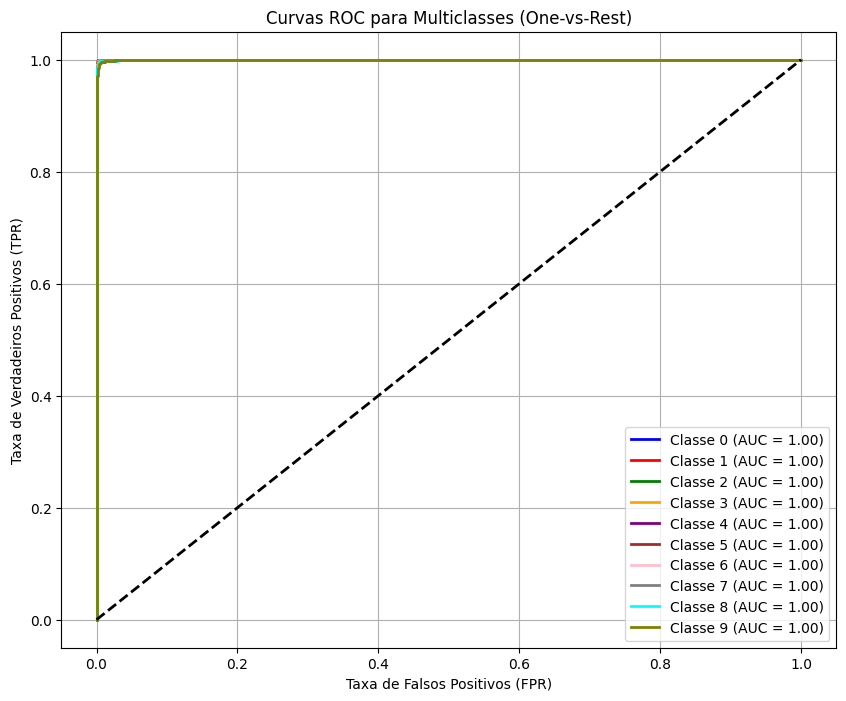

In [57]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_score = model.predict(test_images)

y_true_bin = label_binarize(test_labels, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

n_classes = y_true_bin.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'cyan', 'olive']

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Classe {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curvas ROC para Multiclasses (One-vs-Rest)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()